In [1]:
import numpy as np 
import matplotlib.pyplot as plt



#initial_pellet_size = 50 #microns
N = 100
rho_u = 79663.866
rho_uh3 =  45435.68 #0.045/(100**3)
b = 0.67
velocity = 0.5
rho_h = 0.081
p = 100000 #1 bar

#every unit cell has 8 uranium 

def visccosity(T):
    return (8.76*10e-6)*(365.85/(T+72))*((T/293.85)**1.5)

def diffusitivity_helium(T):
    return 1.032*1e-8 * (T**1.74)

def reaction_rate(T):
    return 0.51*((8.314*T)**0.5)*np.exp(-3033/T)#1#10.4*np.exp(-1592/T)


def diffusivity_constant(T, a):
    return a*np.exp(-2300/(8.314*T))



def core_radius(initial_pellet_size, shrinking_step):
    core_radius_values =  np.arange(initial_pellet_size,-1*shrinking_step , - shrinking_step )
    return core_radius_values
    
#r_c = core_radius(initial_pellet_size, shrinking_step)
def outer_radius(initial_pellet_size, rho_u, rho_uh3, r_c):
    outer_radius_values = np.zeros(N+1)
    for i in range(N+1):
        outer_radius_values[i] =((((initial_pellet_size*1e-6)**3)-((r_c[i]*1e-6)**3))*
                                 (rho_u/rho_uh3)+((r_c[i]*1e-6)**3))**(1/3)
    return outer_radius_values

def mass_transfer(r_o,d, viscosity, r_c):
    kg = np.zeros(N+1)
    sc = viscosity/d
    for i in range(N+1):
        re = rho_h*velocity*2*r_c[i]*1e-6/viscosity
        kg[i] = (2 + (0.6*(sc**(1/3)) * (re**0.5)))*(d)/(2*r_o[i]*1e-6)
    return kg



def const(kr, kg, r_c, r_o, de):
    a =  np.zeros(N+1)
    b =  np.zeros(N+1)
    e =  np.zeros(N+1)
    const = np.zeros(N+1)
    for i in range(N+1):
        a[i] = (((r_c[i]*1e-6)**2)*kr)/((r_o[i]**2)*kg[i])
        b[i] = ((r_c[i]*1e-6)*kr)/(de)
        e[i] = (((r_c[i]*1e-6)**2)*kr)/(de*r_o[i])
        const[i] = a[i]+b[i]-e[i]
    return const



def core_concentration(c_b, const):
    c_c = np.zeros(N+1)
    for i in range(N+1):
        c_c[i] = ((-const[i] + np.sqrt((const[i]**2)+(4*c_b)))/2)**2
    return c_c

#c_c = core_concentration(c_b)
#print(c_c)

def time_taken(b, c_c, shrinking_step, kr):
    time_diff = np.zeros(N+1)
    for i in range(N+1):
        time_diff[i] = ((shrinking_step* 1e-6)*rho_u)/(b*kr*np.sqrt(c_c[i]))#
    
    time = np.cumsum(time_diff)
    return time



def thiele_modulus(initial_pellet_size , kr, c_c, de):
    m = 2*initial_pellet_size*1e6 *(np.sqrt((1.5*kr*(c_c**(-0.5)))/2*de))
    return m


In [2]:
T = 500
initial_pellet_size = 2.5
p = 100000
N=100
a=1.11e-10

In [3]:
shrinking_step = initial_pellet_size/N #=0.025
c_b =  p/(8.314*T)                     #=24
d = diffusitivity_helium(T)            #=0.0005
viscosity = visccosity(T)              #=0.00012
kr = reaction_rate(T)                  #=0.076
de = diffusivity_constant(T, a)        #=6.3831486238254e-11
r_c = core_radius(initial_pellet_size, shrinking_step) #1D array from initial radius to 0
                                                       #in steps of shrinking steps

r_o = outer_radius(initial_pellet_size, rho_u, rho_uh3, r_c) #eqn 24 applied to get outer R
kg = mass_transfer(r_o,d, viscosity, r_c)  #kg at each time step from eqns 25,26,27
const1 = const(kr,kg, r_c, r_o,de)         #array of const for each time point
c_c = core_concentration(c_b, const1)      #core concentration at each time point
time = time_taken(0.667, c_c, shrinking_step, kr) #time taken between each step eqn 18
x = r_c/initial_pellet_size
pressure_change = (1800 - ((3/((4/3)*3.14*((initial_pellet_size*1e-6)**3)*19.1e6))*((4/3)*3.14*((initial_pellet_size*1e-6)**3 - (r_c*1e-6)**3))*rho_u*1.5*8.314*T/0.00048)/100)
m = thiele_modulus(initial_pellet_size , kr, c_c, de)
y =  np.log10(c_c) #logs c_c

#returns time, normalised core sizes (x), pressure change, logged core h conc (y),relative pellet raius, theiele

In [4]:

#----------------------------------------------------------------------------
#Initial Conditions with varying pellet size
T = 500

#calling the functions: 
def simulation(T, initial_pellet_size, p, N, a):
    shrinking_step = initial_pellet_size/N
    c_b =  p/(8.314*T)
    d = diffusitivity_helium(T)
    viscosity = visccosity(T)
    kr = reaction_rate(T)  
    de = diffusivity_constant(T, a)
    r_c = core_radius(initial_pellet_size, shrinking_step)
    r_o = outer_radius(initial_pellet_size, rho_u, rho_uh3, r_c)
    kg = mass_transfer(r_o,d, viscosity, r_c)
    const1 = const(kr,kg, r_c, r_o,de)
    c_c = core_concentration(c_b, const1)
    time = time_taken(0.667, c_c, shrinking_step, kr)
    x = r_c/initial_pellet_size
    relitive_sphere_radius = r_o/(initial_pellet_size*1e-6)
    pressure_change = (1800 - ((3/((4/3)*3.14*((initial_pellet_size*1e-6)**3)*19.1e6))*((4/3)*3.14*((initial_pellet_size*1e-6)**3 - (r_c*1e-6)**3))*rho_u*1.5*8.314*T/0.00048)/100)
    m = thiele_modulus(initial_pellet_size , kr, c_c, de)
    y =  np.log10(c_c)
    return time, x, pressure_change, y, relitive_sphere_radius, m



In [5]:
time,core_size,pressurem,y,outer_size,mm = simulation(500, 3, 200000, 100, 1e-10)

In [6]:
%matplotlib notebook

<IPython.core.display.Javascript object>


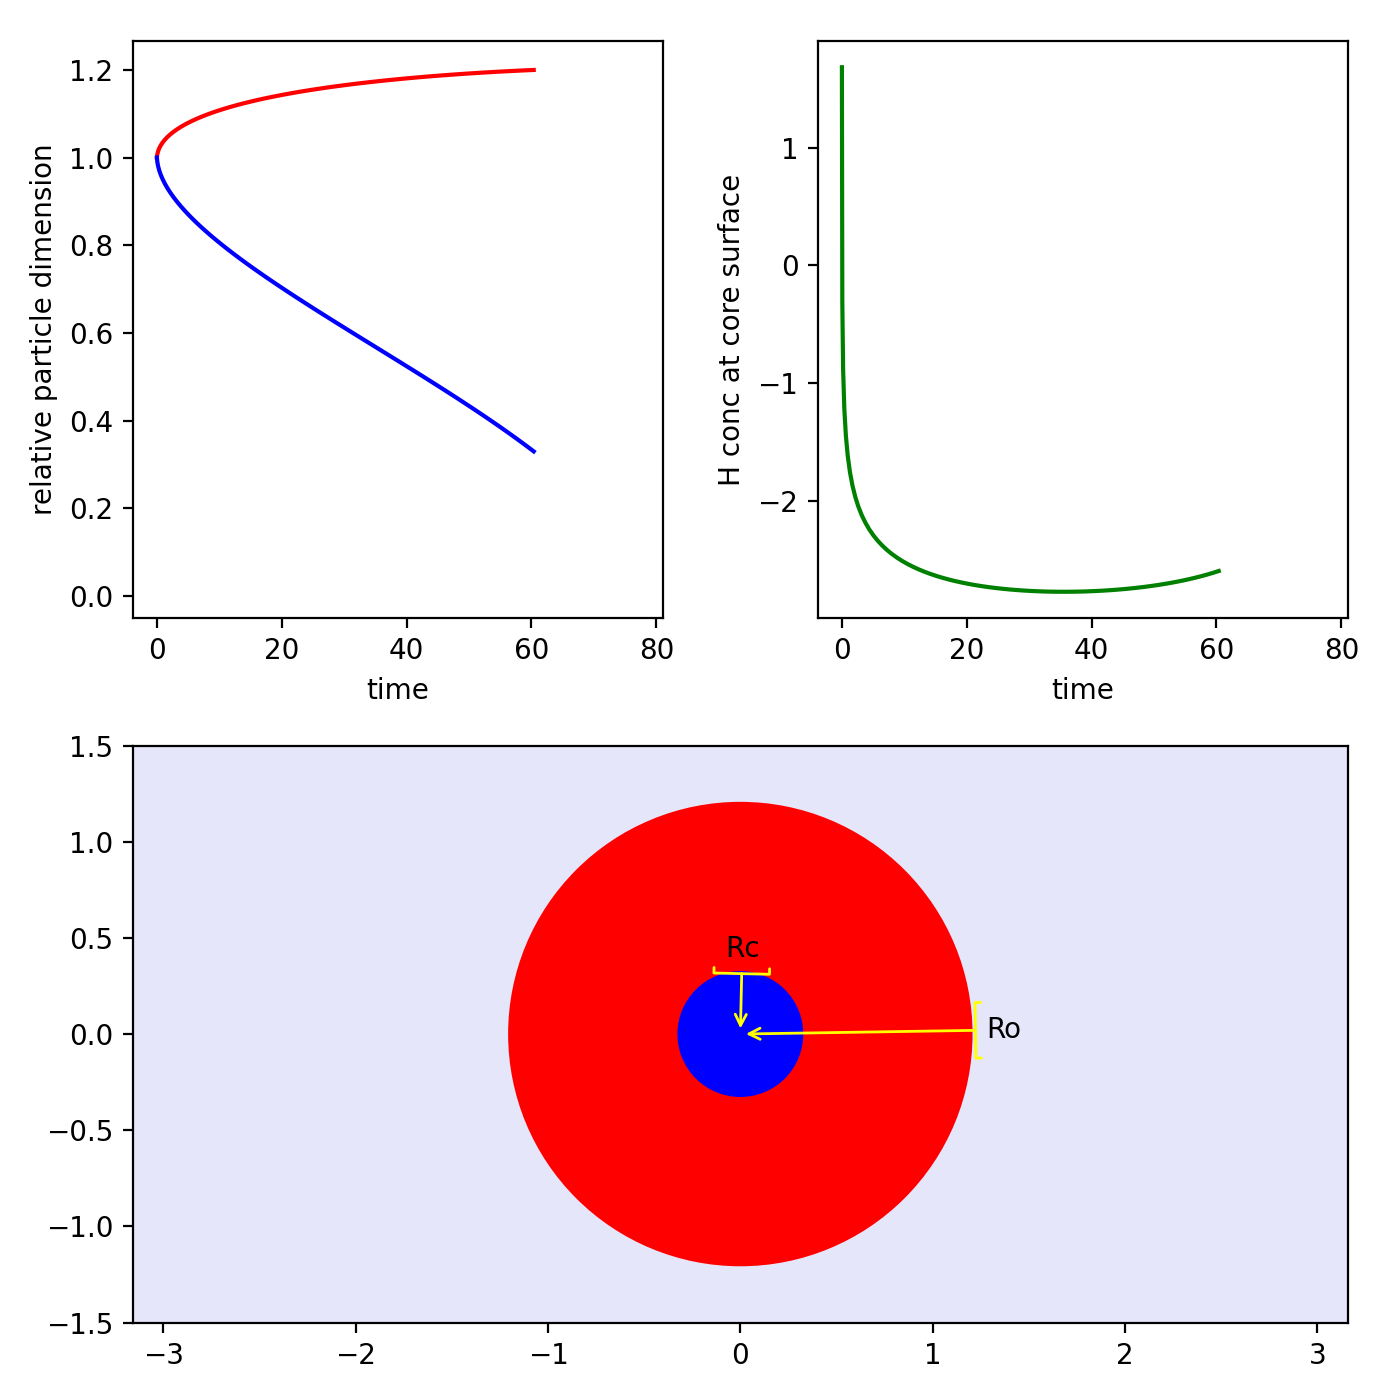

In [7]:
from matplotlib import cm
import numpy as np
from celluloid import Camera
from matplotlib import patches as pt
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure(figsize=(7,7))
centre_x=0
centre_y=0
gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])
ax1.set(ylabel='relative particle dimension', xlabel='time')
ax2.set(ylabel='H conc at core surface', xlabel='time')
ax3.set(xlim=(-1.5,1.5),ylim=(-1.5,1.5))
fig.tight_layout()
ax3.axis('equal')
#ax1.legend('R(t)')
ax3.set_facecolor('lavender')
#white_patch = pt.Patch(color='ghostwhite', label = 'H, conc at surface, ca')
#blue_patch = pt.Patch(color='blue', label='U')
#red_patch = pt.Patch(color='red', label='UH3')

red_patch = pt.Patch(color='red', label='UH3')
#ax3.legend(handles=[red_patch])
#legend = plt.legend(handles=[red_patch]) # Create the legend 
#ax3.add_artist(legend)



camera = Camera(fig)
for _ in range(0,101):
    ax2.plot(time[:_],y[:_],color='green' )
    ax3.add_patch(plt.Circle((centre_x,centre_y),outer_size[_], color='red'))
    ax3.add_patch(plt.Circle((centre_x,centre_y),core_size[_], color='blue'))
    #xpos = 0*2
    ax3.annotate("Ro", xy=(centre_x, centre_y), xytext=(outer_size[_]+0.08, -0.02),arrowprops=dict(arrowstyle="]->", color='yellow'))
    ax3.annotate("Rc", xy=(centre_x, centre_y), xytext=(-0.08, core_size[_]+0.083),arrowprops=dict(arrowstyle="]->", color='yellow'))

    
    ax1.plot(time[:_], outer_size[:_], label='R(t)', color='red')
    ax1.plot(time[:_], core_size[:_], color='blue')

    camera.snap()
anim = camera.animate(interval=100, blit=True)

plt.show()